In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#%matplotlib notebook

In [51]:
typical_delta_SWE = np.linspace(0.000001,30,100)*2 #up to 30cm change in a week
typical_velocity_in_cm = np.linspace(0.000001,5,100) #cm/unittime * delta_t
delta_t = 12

In [52]:
wavelength = 5.5 #cm
alpha = 1
theta = 0.645772 # 37 degrees
slope = 11
incidence = 37
v_m_LOS = (typical_velocity_in_cm*np.cos(np.deg2rad((90-incidence)+slope)))
#plt.plot(v_m_LOS,typical_velocity_in_cm)

In [53]:
phase_contribution_SWE = ((2*np.pi)/wavelength)*(alpha*(1.59+theta**(5/2)))*typical_delta_SWE
phase_contribution_velocity = (4*np.pi/wavelength)*v_m_LOS*delta_t

In [54]:
vel,swe = np.meshgrid(phase_contribution_velocity,phase_contribution_SWE,sparse=True)
proportion_swe = swe / (swe+vel)

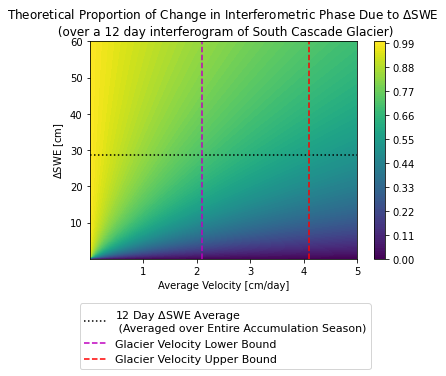

In [55]:
fig,ax=plt.subplots(1,1)
props = ax.contourf(typical_velocity_in_cm,typical_delta_SWE,proportion_swe,100)
fig.colorbar(props)
plt.title('Theoretical Proportion of Change in Interferometric Phase Due to $\Delta$SWE \n (over a 12 day interferogram of South Cascade Glacier)')
ax.set_ylabel('$\Delta$SWE [cm]')
ax.set_xlabel('Average Velocity [cm/day]')
plt.plot([0,5], [28.57,28.57], 'k:',label='12 Day $\Delta$SWE Average \n (Averaged over Entire Accumulation Season)')
plt.plot([2.1,2.1], [0,60], 'm--',label='Glacier Velocity Lower Bound')
plt.plot([4.1,4.1], [0,60], 'r--',label='Glacier Velocity Upper Bound')
plt.legend(bbox_to_anchor=(1.07, -0.18),loc='upper right',prop={'size': 11})
plt.show()

In [56]:
fig.savefig('proportion_change_due_to_delta_swe.png', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
plt.close(fig)